In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

clients = pd.read_csv("../data/clients_clean.csv")
orders  = pd.read_csv("../data/orders_clean.csv")
products = pd.read_csv("../data/products_clean.csv")

sns.set(style="whitegrid")

clients.head()


,client_id,first_name,last_name,gender,age,email,city,address,postal_code,country,...,freq_s2,churn,recency_segment,frequency_segment,spender_segment,R_rank,F_rank,M_rank,RFM_score,churn_risk_segment
0,21e5c13d-1c9a-4d00-9164-b72302d5edef,Tristán,Rojas,M,42,tristán.rojas13@example.com,Rivera,Bulevar Artigas 3757,28289,Uruguay,...,11.0,0,3 - Tardío,3 - Ocasional,3 - Medio,2,3,3,8,Bajo riesgo
1,36e48bdd-db11-4abe-9526-cfc90e68924d,Óscar,Barranco,M,58,óscar.barranco13@example.com,Salto,Bulevar Artigas 3911,76237,Uruguay,...,31.0,0,1 - Muy reciente,4 - Rara vez,4 - Bajo gasto,4,4,4,12,Bajo riesgo
2,145c22df-3579-412e-bc12-b4fce70abaf3,Macario,Querol,M,28,macario.querol67@example.com,Rivera,Av. Rivera 206,30926,Uruguay,...,8.0,0,3 - Tardío,3 - Ocasional,3 - Medio,2,3,3,8,Bajo riesgo
3,90c4a925-e51f-4dac-9193-2d9aec97a472,Ramiro,Sanchez,M,19,ramiro.sanchez53@example.com,Salto,Av. 18 de Julio 6324,22676,Uruguay,...,5.0,0,1 - Muy reciente,1 - Muy frecuente,1 - Alto gasto,4,1,1,6,Riesgo medio
4,853f711a-4c36-40b4-b5d0-6207152cd793,Juan Francisco,Flor,M,36,juan francisco.flor68@example.com,Mercedes,Av. 18 de Julio 6301,20328,Uruguay,...,0.0,1,1 - Muy reciente,1 - Muy frecuente,1 - Alto gasto,4,1,1,6,Riesgo medio


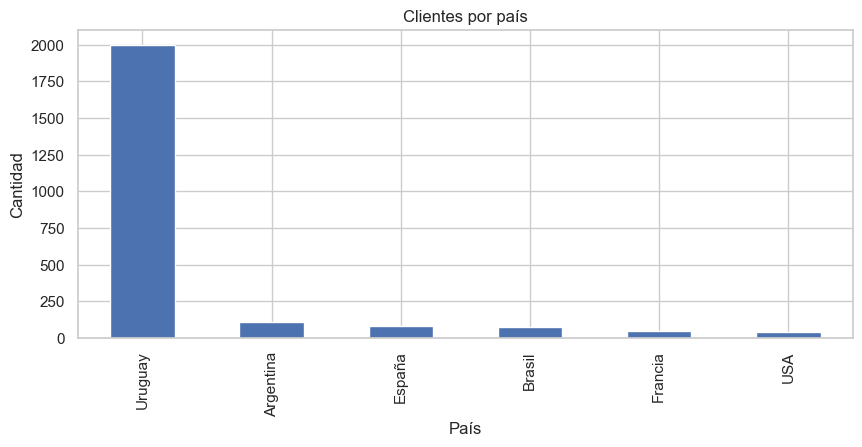

In [57]:
plt.figure(figsize=(10,4))
clients['country'].value_counts().head(10).plot(kind="bar")
plt.title("Clientes por país")
plt.xlabel("País")
plt.ylabel("Cantidad")
plt.show()


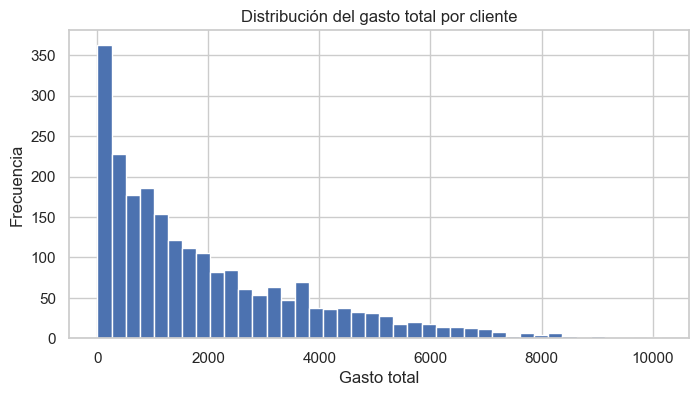

In [58]:
plt.figure(figsize=(8,4))
orders.groupby("client_id")["order_price"].sum().plot(kind="hist", bins=40)
plt.title("Distribución del gasto total por cliente")
plt.xlabel("Gasto total")
plt.ylabel("Frecuencia")
plt.show()


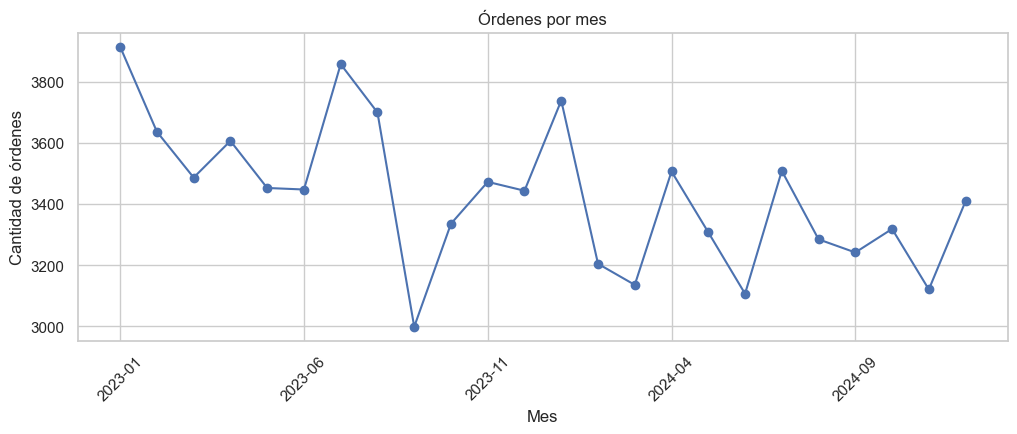

In [59]:
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'])

orders['month'] = orders['order_timestamp'].dt.to_period("M").astype(str)

plt.figure(figsize=(12,4))
orders['month'].value_counts().sort_index().plot(kind="line", marker="o")
plt.title("Órdenes por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de órdenes")
plt.xticks(rotation=45)
plt.show()


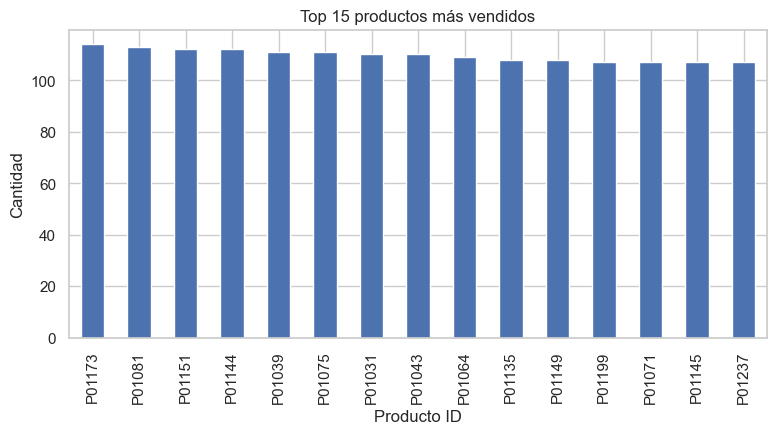

In [60]:
plt.figure(figsize=(9,4))
orders['product_id'].value_counts().head(15).plot(kind="bar")
plt.title("Top 15 productos más vendidos")
plt.xlabel("Producto ID")
plt.ylabel("Cantidad")
plt.show()


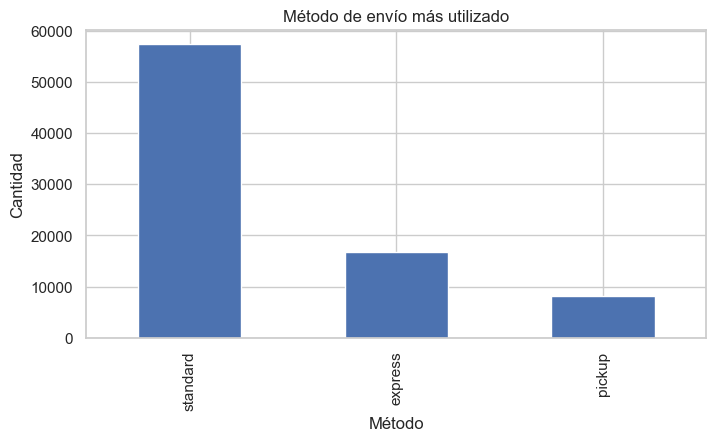

In [61]:
plt.figure(figsize=(8,4))
orders['shipping_method'].value_counts().plot(kind="bar")
plt.title("Método de envío más utilizado")
plt.xlabel("Método")
plt.ylabel("Cantidad")
plt.show()


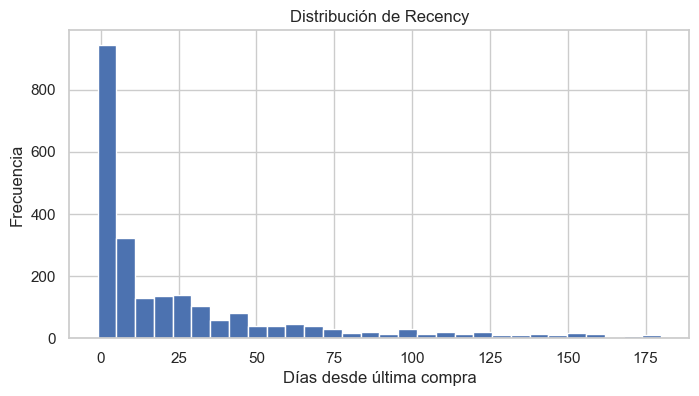

In [62]:
plt.figure(figsize=(8,4))
clients['recency'].plot(kind="hist", bins=30)
plt.title("Distribución de Recency")
plt.xlabel("Días desde última compra")
plt.ylabel("Frecuencia")
plt.show()


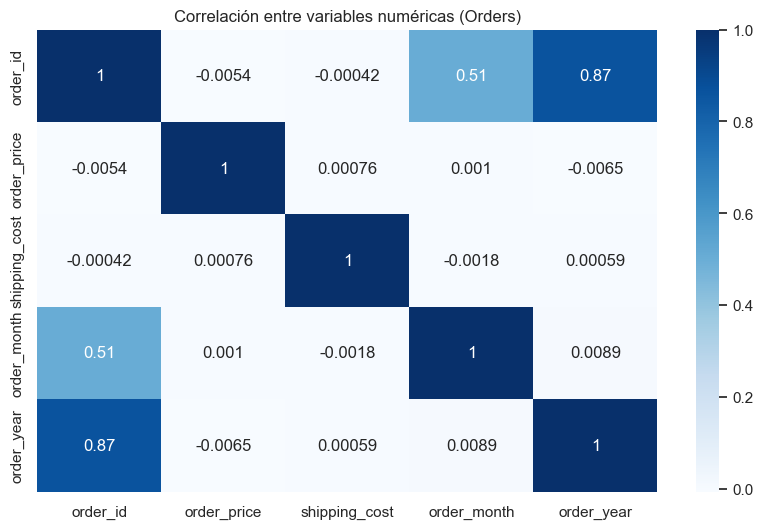

In [63]:
numeric_cols = orders.select_dtypes(include="number")
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="Blues")
plt.title("Correlación entre variables numéricas (Orders)")
plt.show()



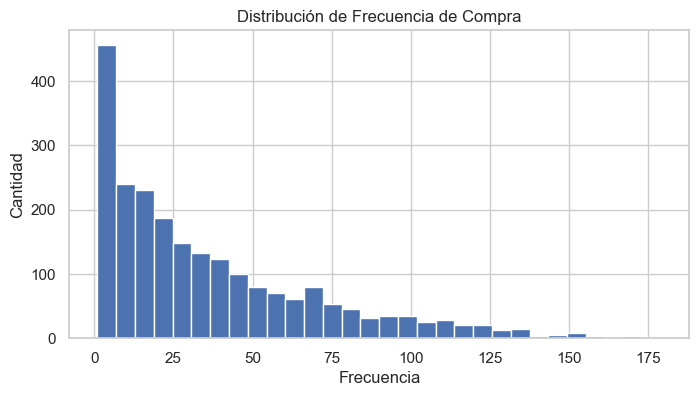

In [64]:
frequency = orders.groupby("client_id").size()

plt.figure(figsize=(8,4))
frequency.plot(kind="hist", bins=30)
plt.title("Distribución de Frecuencia de Compra")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.show()


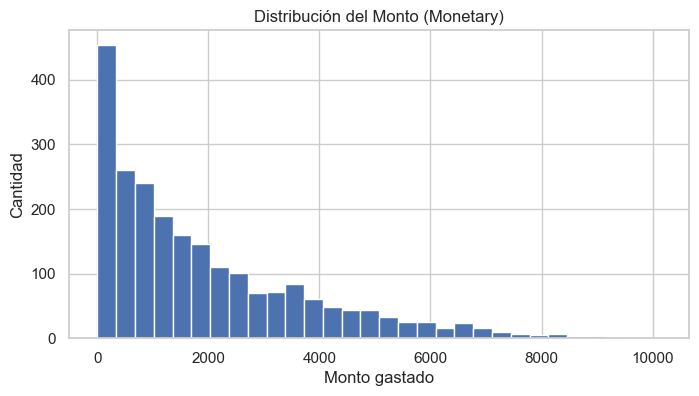

In [65]:
monetary = orders.groupby("client_id")["order_price"].sum()

plt.figure(figsize=(8,4))
monetary.plot(kind="hist", bins=30)
plt.title("Distribución del Monto (Monetary)")
plt.xlabel("Monto gastado")
plt.ylabel("Cantidad")
plt.show()


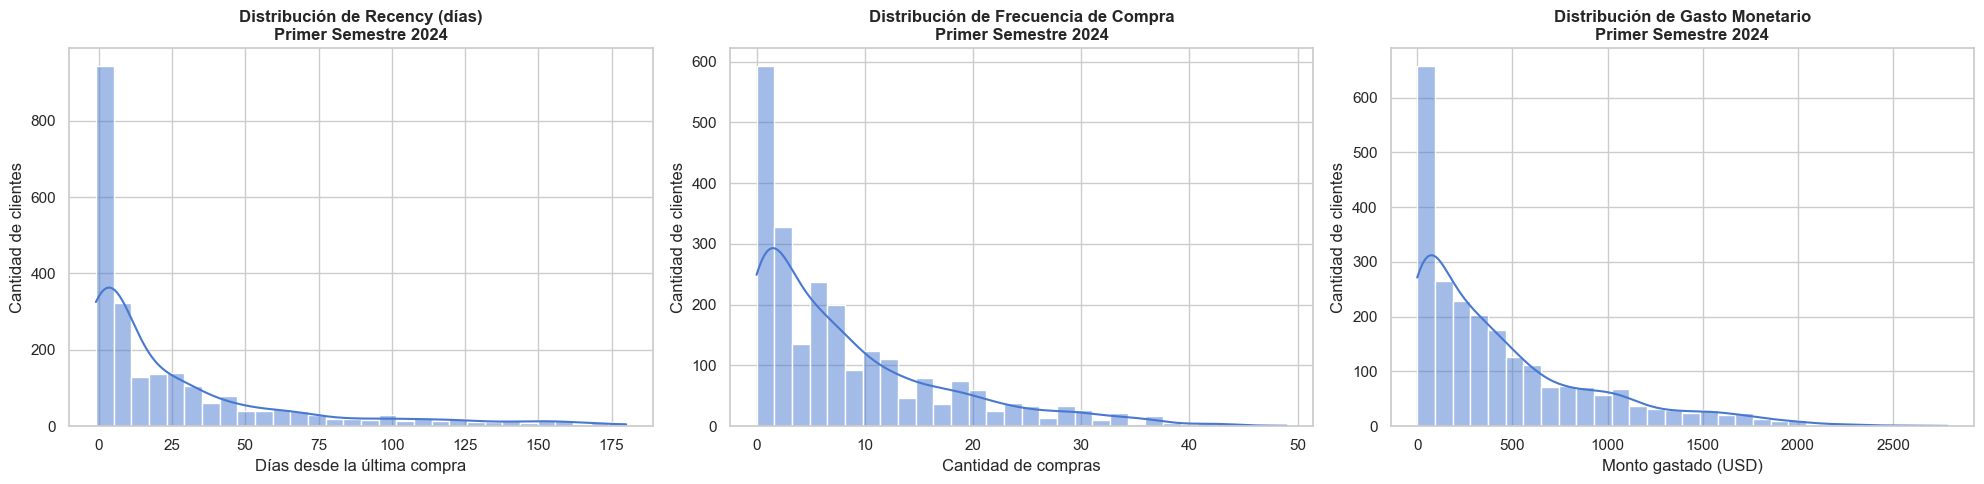

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# ==========================
#   RFM HISTOGRAMAS
# ==========================

# --- Recency ---
sns.histplot(
    data=clients,
    x="recency",
    kde=True,
    ax=axes[0],
    bins=30,
)
axes[0].set_title("Distribución de Recency (días)\nPrimer Semestre 2024",
                  fontsize=12, fontweight="bold")
axes[0].set_xlabel("Días desde la última compra")
axes[0].set_ylabel("Cantidad de clientes")

# --- Frequency ---
sns.histplot(
    data=clients,
    x="frequency",
    kde=True,
    ax=axes[1],
    bins=30,
)
axes[1].set_title("Distribución de Frecuencia de Compra\nPrimer Semestre 2024",
                  fontsize=12, fontweight="bold")
axes[1].set_xlabel("Cantidad de compras")
axes[1].set_ylabel("Cantidad de clientes")

# --- Monetary ---
sns.histplot(
    data=clients,
    x="monetary",
    kde=True,
    ax=axes[2],
    bins=30,
)
axes[2].set_title("Distribución de Gasto Monetario\nPrimer Semestre 2024",
                  fontsize=12, fontweight="bold")
axes[2].set_xlabel("Monto gastado (USD)")
axes[2].set_ylabel("Cantidad de clientes")

plt.tight_layout()
plt.show()



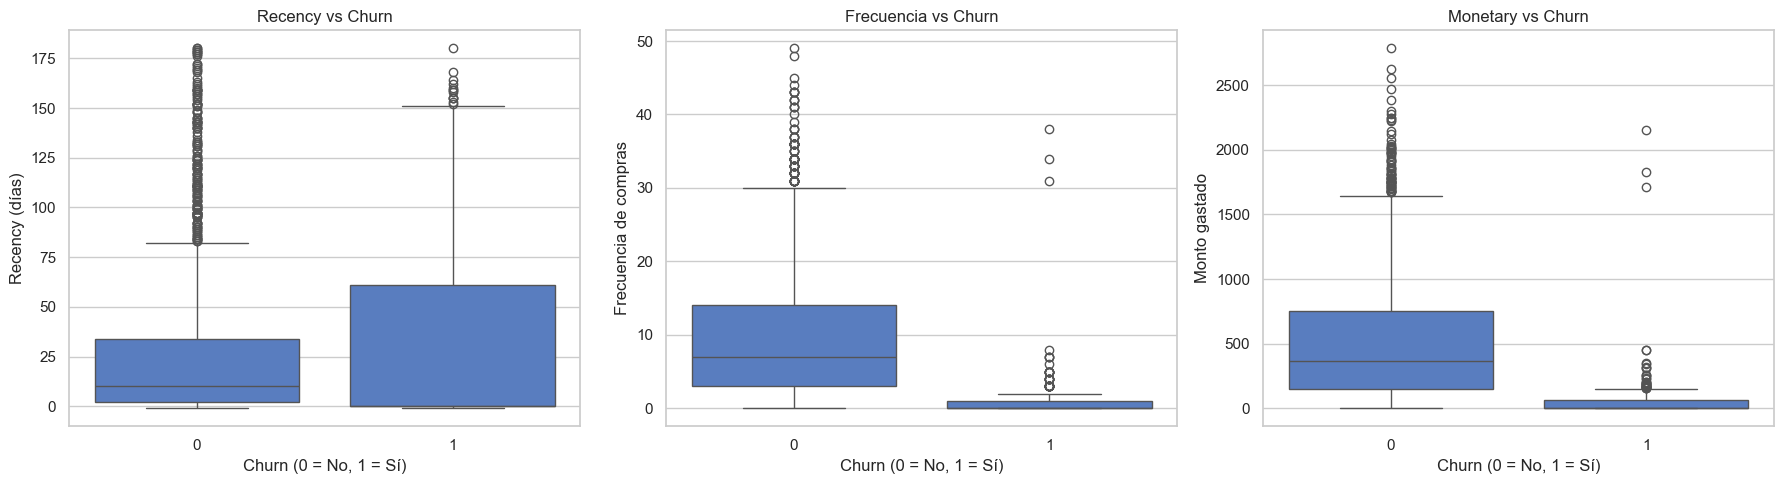

In [82]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# --- Recency vs Churn ---
sns.boxplot(
    x="churn",
    y="recency",
    data=clients,
    ax=axes[0]
)
axes[0].set_title("Recency vs Churn")
axes[0].set_xlabel("Churn (0 = No, 1 = Sí)")
axes[0].set_ylabel("Recency (días)")

# --- Frequency vs Churn ---
sns.boxplot(
    x="churn",
    y="frequency",
    data=clients,
    ax=axes[1]
)
axes[1].set_title("Frecuencia vs Churn")
axes[1].set_xlabel("Churn (0 = No, 1 = Sí)")
axes[1].set_ylabel("Frecuencia de compras")

# --- Monetary vs Churn ---
sns.boxplot(
    x="churn",
    y="monetary",
    data=clients,
    ax=axes[2]
)
axes[2].set_title("Monetary vs Churn")
axes[2].set_xlabel("Churn (0 = No, 1 = Sí)")
axes[2].set_ylabel("Monto gastado")

plt.tight_layout()
plt.show()


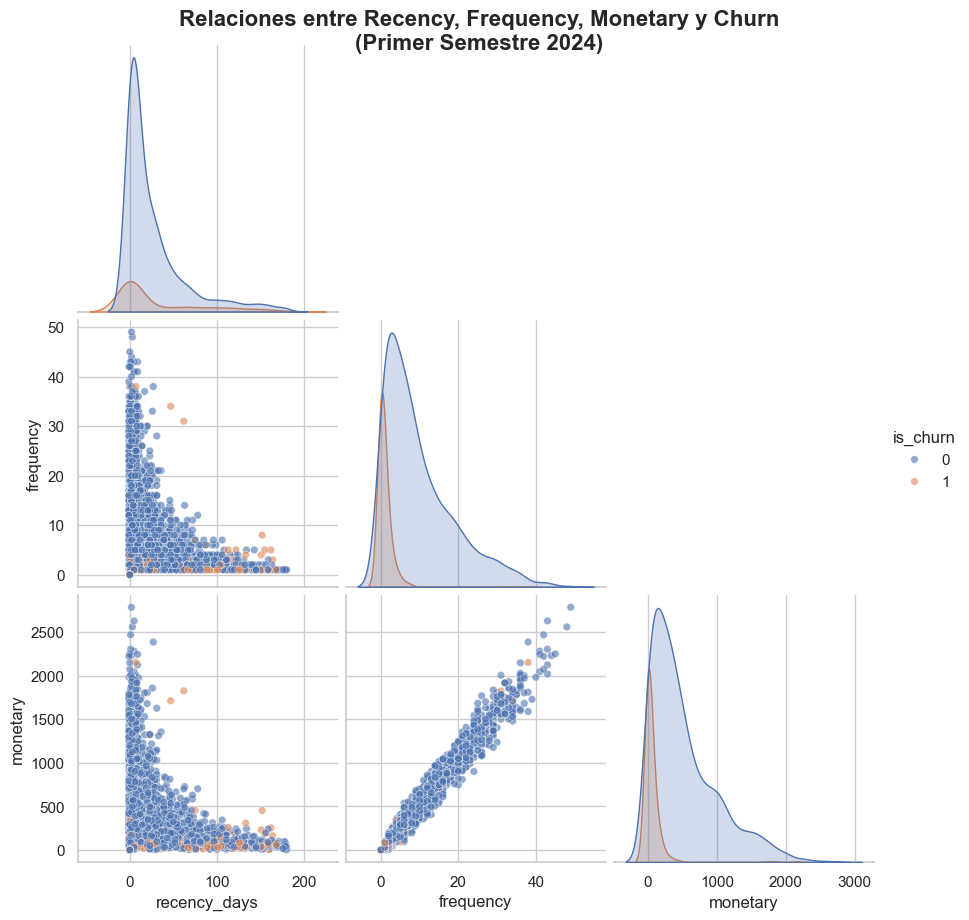

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos el dataframe para pairplot
pairplot_df = features[["recency_days", "frequency", "monetary", "is_churn"]].copy()

sns.set_theme(style="whitegrid")

# Pairplot
g = sns.pairplot(
    data=pairplot_df,
    hue="is_churn",
    diag_kind="kde",
    corner=True,
    plot_kws={"alpha": 0.6, "s": 30},
    height=3
)

# Agregar título general
plt.suptitle(
    "Relaciones entre Recency, Frequency, Monetary y Churn\n(Primer Semestre 2024)",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.show()

#La gráfica muestra cómo se relacionan las métricas de comportamiento del cliente (Recency, Frequency y Monetary) con la variable objetivo CHURM, esto nos permite 
#identificar patrones visuales entre quienes abandonan y quienes continúan comprando. Se observa que los clientes con churn tienden a presentar valores de recency 
# más altos (mayor tiempo desde la última compra) y menores niveles de frecuencia y gasto, lo cual refuerza la teoría de que ha más tiempo pase de uso, mayor probabilidad de churn.

In [67]:

# Variables para usar en ML
features = ["recency", "frequency", "monetary", "age"]
target = "churn"

X = clients[features]
y = clients[target]

X.head()


,recency,frequency,monetary,age
0,21.0,11.0,614.39,42
1,-1.0,26.0,1768.81,58
2,24.0,8.0,509.03,28
3,0.0,0.0,0.00,19
4,0.0,0.0,0.00,36


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report

tree = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=20,
    random_state=42
)

tree.fit(X_train, y_train)
preds = tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("F1:", f1_score(y_test, preds))
print(classification_report(y_test, preds))


Accuracy: 0.864406779661017
F1: 0.5076923076923077
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       403
           1       0.54      0.48      0.51        69

    accuracy                           0.86       472
   macro avg       0.73      0.70      0.71       472
weighted avg       0.86      0.86      0.86       472



In [77]:
print(clients[["recency_segment", "frequency_segment", "spender_segment"]].head())


    recency_segment  frequency_segment spender_segment
0        3 - Tardío      3 - Ocasional       3 - Medio
1  1 - Muy reciente       4 - Rara vez  4 - Bajo gasto
2        3 - Tardío      3 - Ocasional       3 - Medio
3  1 - Muy reciente  1 - Muy frecuente  1 - Alto gasto
4  1 - Muy reciente  1 - Muy frecuente  1 - Alto gasto


In [78]:
# Accuracy y F1 por segmento

from sklearn.metrics import accuracy_score, f1_score

def metrics_by_segment(df, segment_col, y_test, preds):
    df_temp = df.loc[y_test.index].copy()
    df_temp["pred"] = preds
    df_temp["real"] = y_test

    segmentos = df_temp[segment_col].unique()

    print(f"\n===== MÉTRICAS POR SEGMENTO: {segment_col} =====")

    for seg in segmentos:
        subset = df_temp[df_temp[segment_col] == seg]

        acc = accuracy_score(subset["real"], subset["pred"])
        f1  = f1_score(subset["real"], subset["pred"])

        print(f"Segmento: {seg}")
        print(f"   Accuracy: {acc:.4f}")
        print(f"   F1-score: {f1:.4f}")
        print("")

# EJEMPLOS:
metrics_by_segment(clients, "spender_segment", y_test, preds_rf)
metrics_by_segment(clients, "frequency_segment", y_test, preds_rf)
metrics_by_segment(clients, "churn_risk_segment", y_test, preds_rf)
metrics_by_segment(clients, "RFM_score", y_test, preds_rf)



===== MÉTRICAS POR SEGMENTO: spender_segment =====
Segmento: 4 - Bajo gasto
   Accuracy: 1.0000
   F1-score: 0.0000

Segmento: 3 - Medio
   Accuracy: 0.9904
   F1-score: 0.0000

Segmento: 1 - Alto gasto
   Accuracy: 0.6777
   F1-score: 0.6609

Segmento: 2 - Medio-alto
   Accuracy: 0.8943
   F1-score: 0.1333


===== MÉTRICAS POR SEGMENTO: frequency_segment =====
Segmento: 4 - Rara vez
   Accuracy: 1.0000
   F1-score: 0.0000

Segmento: 3 - Ocasional
   Accuracy: 0.9913
   F1-score: 0.0000

Segmento: 2 - Frecuente
   Accuracy: 0.8899
   F1-score: 0.1429

Segmento: 1 - Muy frecuente
   Accuracy: 0.6899
   F1-score: 0.6552


===== MÉTRICAS POR SEGMENTO: churn_risk_segment =====
Segmento: Bajo riesgo
   Accuracy: 0.9953
   F1-score: 0.0000

Segmento: Alto riesgo
   Accuracy: 0.8220
   F1-score: 0.2222

Segmento: Riesgo medio
   Accuracy: 0.7817
   F1-score: 0.6990


===== MÉTRICAS POR SEGMENTO: RFM_score =====
Segmento: 9
   Accuracy: 1.0000
   F1-score: 0.0000

Segmento: 8
   Accuracy: 0.9

c:\Users\juanm\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\juanm\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\juanm\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    random_state=42
)

rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, preds_rf))
print("RF F1:", f1_score(y_test, preds_rf))


RF Accuracy: 0.8877118644067796
RF F1: 0.5954198473282443


In [71]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=200)
logit.fit(X_train, y_train)

preds_log = logit.predict(X_test)

print("Logit Accuracy:", accuracy_score(y_test, preds_log))
print("Logit F1:", f1_score(y_test, preds_log))


Logit Accuracy: 0.8538135593220338
Logit F1: 0.0


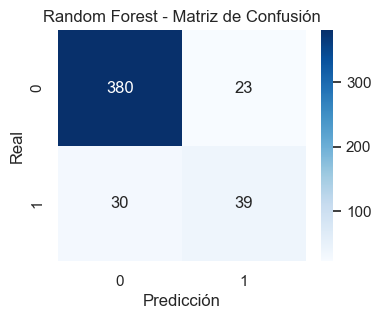

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds_rf)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


In [73]:
import mlflow
import mlflow.sklearn

mlflow.set_experiment("churn_experiment")

with mlflow.start_run():
    mlflow.log_param("model", "RandomForest")
    mlflow.log_param("n_estimators", 200)
    mlflow.log_metric("accuracy", accuracy_score(y_test, preds_rf))
    mlflow.log_metric("f1", f1_score(y_test, preds_rf))

    mlflow.sklearn.log_model(rf, "model_rf")


2025/11/14 01:30:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/14 01:30:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [75]:
import os
print(os.path.abspath("../data/clients_clean.csv"))


c:\Users\juanm\OneDrive\Escritorio\tp-churn\data\clients_clean.csv


In [76]:
clients = pd.read_csv("../data/clients_clean.csv")
print(clients.columns.tolist())


['client_id', 'first_name', 'last_name', 'gender', 'age', 'email', 'city', 'address', 'postal_code', 'country', 'citizenship', 'document_type', 'document_number', 'registration_date', 'last_seen', 'order_timestamp', 'recency', 'frequency', 'monetary', 'freq_s1', 'freq_s2', 'churn', 'recency_segment', 'frequency_segment', 'spender_segment', 'R_rank', 'F_rank', 'M_rank', 'RFM_score', 'churn_risk_segment']
